<a href="https://colab.research.google.com/github/ilman79/Chapter2-Binary/blob/main/Challenge_ChapterII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Deskripsi Data

Pada dataset kali ini, dataset yang digunakan adalah dataset pelanggan yang gunakan provider kami. didalamnya terdapat beberapa kolumn data yang disajikan sebagai berikut,

- state ( Negara)                           
- account_length (berapa lama akun pelanggan digunakan)                  
- area_code (kode wilayah)                      
- international_plan (apakah pelanggan memiliki atau tidak memiliki paket rencana internasional)              
- voice_mail_plan(apakah pelanggan memiliki atau tidak memiliki paket rencana voicemail)                 
- number_vmail_messages(jumlah pesan voicemail yang diterima oleh pelanggan)          
- total_day_minutes(total menit yang dihabiskan pelanggan untuk panggilan pada periode hari)             
- total_day_calls(total panggilan yang dilakukan oleh pelanggan pada periode hari)                 
- total_day_charge (total biaya yang dikenakan kepada pelanggan untuk penggunaan layanan pada periode hari)               
- total_eve_minutes( total menit yang dihabiskan pelanggan untuk panggilan pada tiap hari)              
- total_eve_calls(total panggilan yang dilakukan oleh pelanggan setiap hari)                 
- total_eve_charge(biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan setiap hari)               
- total_night_minutes(total menit panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)            
- total_night_calls(jumlah panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)              
- total_night_charge (dapat mencerminkan biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan pada periode malam hari)             
- total_intl_minutes (total durasi waktu (dalam menit) yang dihabiskan oleh pelanggan untuk melakukan panggilan ke tujuan internasional)             
- total_intl_calls (jumlah total panggilan internasional)                 
- total_intl_charge (biaya panggilan untuk internasional)              
- number_customer_service_calls (jumlah panggilan atau kontak yang diterima oleh departemen layanan)   
- churn (berhenti/ berpindah)                           

#1. Import Library & Data

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

##Data Train

In [256]:
url = "https://raw.githubusercontent.com/ilman79/Chapter2-Binary/main/Data%20Train.csv"
df = pd.read_csv(url)

In [257]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [258]:
df.shape

(4250, 20)

terdapat 20 kolom dan 4250 baris pada data yang kita gunakan

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Ada beberapa yang harus kita ubah pada tipe datanya yaitu 'churn' menjadi number menjadi 1 dan 0, dimana yes diubah menjadi 1 dan no diubah menjadi 0. begitu juga dengan 'international_plan', 'voice_mail_plan' dan sisanya sudah sesuai

In [260]:
catregoriz = ['churn','international_plan','voice_mail_plan']

def categorize_churn(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz:
    df[col] = df[col].apply(categorize_churn)

mengantisipasi jika ada missing value tidak kita isikan dengan 0 tetapi dengan NaN

In [261]:
df[['churn','international_plan','voice_mail_plan']]

,churn,international_plan,voice_mail_plan
0,0,0,1
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
4245,0,0,0
4246,0,0,0
4247,0,0,0
4248,0,0,1


##Data Test

In [262]:
url2 = "https://raw.githubusercontent.com/ilman79/Chapter2-Binary/main/Data%20Test.csv"
df2 = pd.read_csv(url2)

In [263]:
df2 = df2.drop(['id'], axis=1)

In [264]:
df2.shape

(750, 19)

Terdapat 750 baris data dan 19 kolumn untuk data test yang akan digunakan

In [265]:
catregoriz2 = ['international_plan','voice_mail_plan']

def categorize_churn2(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz2:
    df2[col] = df2[col].apply(categorize_churn2)

In [266]:
df[['international_plan','voice_mail_plan']]

,international_plan,voice_mail_plan
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
4245,0,0
4246,0,0
4247,0,0
4248,0,1


# 2. Exploratory Data Analysis (EDA)

##Data Train

In [267]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,state,area_code
0,OH,area_code_415
1,NJ,area_code_415
2,OH,area_code_408
3,OK,area_code_415
4,MA,area_code_510


In [268]:
df.state.value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

pelanggan terbanyak dari negara WV

In [269]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Ada beberapa data yang perlu diperhatikan yaitu total_day_minutes

0    85.929412
1    14.070588
Name: churn, dtype: float64


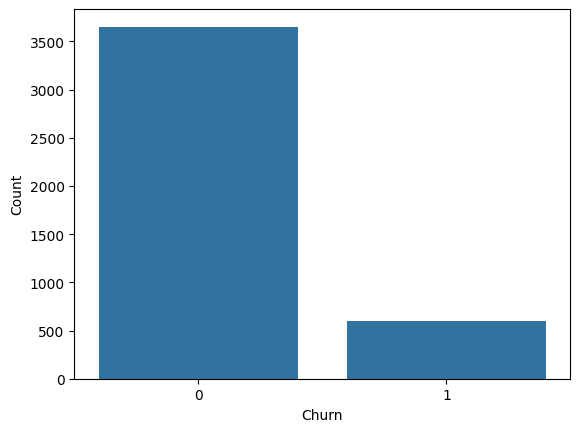

In [270]:
# Membuat diagram batang menggunakan Seaborn
sns.countplot(x='churn', data=df)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Churn')
plt.ylabel('Count')

# Menampilkan plot
print(df.churn.value_counts()/len(df)*100)
plt.show()

Dari hasil grafik diatas, terlihat bahwa 85,9% memutuskan tidak berpindah atau tetap pada prodiver yang sama dan 14,1% memutuskan untuk berpindah ke provider lain.

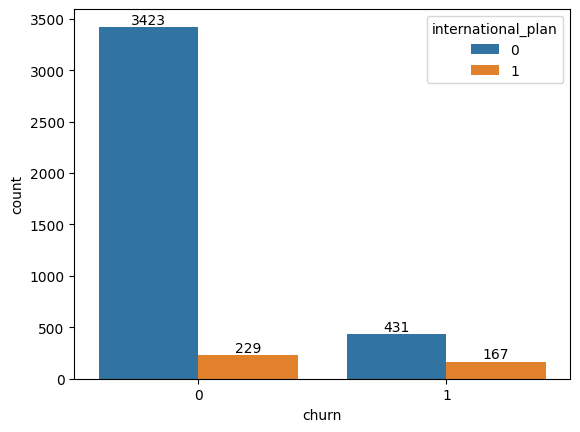

In [271]:
ax = sns.countplot(x=df["churn"],
              hue=df["international_plan"])
for i in ax.containers:
    ax.bar_label(i,)

Terdapat 3423 pelanggan yang tidak berpindah tidak memiliki rencana paket internasional lebih banyak dibanding dengan yang lain.

#3. Data Preprocessing

##Data Train

### 3.1 Mengecek Duplikasi data

In [272]:
df.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

### 3.2 Cek Missing Value

In [273]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

##3.3 Mengecek ada nya Noise

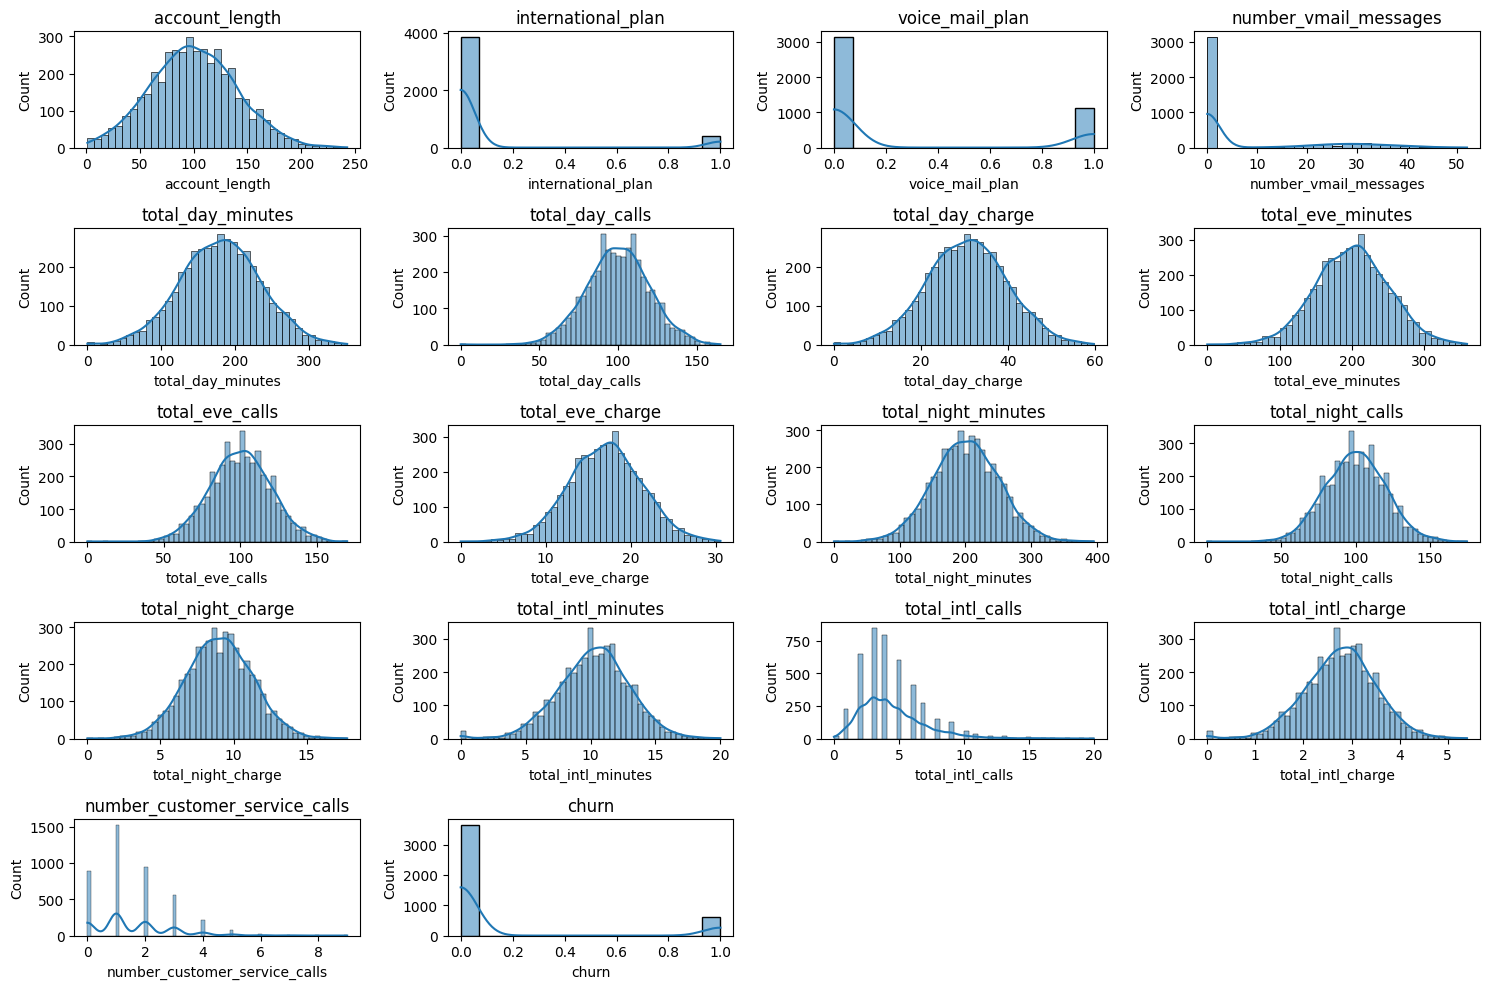

In [274]:
df_numerik = df.select_dtypes(include = ['float64', 'int64'])
if not df_numerik.empty:
    n_rows = len(df_numerik.columns) // 4 + (len(df_numerik.columns) % 4 > 0)  # Membagi jumlah kolom dengan 4, menambahkan 1 jika ada sisa
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(df_numerik.columns, 1):
        plt.subplot(n_rows, 4, i)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(col)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame numerik kosong.")


berdasarkan hasil grafik diatas, terlihat tidak ada variabel yang memiliki nilai tidak wajar atau noise. Pada grafik total_int_calls memang terlihat tidak normal tetapi jika dilihat dari dataset yang digunakan bahwa besar kemungkinan terjadi.

##**Data Test**

###3.1 Mengecek Duplikasi Data

In [275]:
df2.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

##3.2 Mengecek Missing Value

In [276]:
df2.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

#4. Machine Learning Algorithm

In [277]:
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

###4.1 Membangun model dengan One-Hot-Encoding

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [279]:
# transformasi seluruh variabel kategorik
print(df.shape)
for col in df.select_dtypes('object').columns:
  if col != 'churn':
    transformasi = pd.get_dummies(df[col], prefix='')
    df= pd.concat([df, transformasi], axis = 1)
    # hapus variabel kategorik awal, sudah tidak diperlukan
    try:
      df.drop([col], axis=1, inplace=True)
    except Exception as err_:
      print(err_)

print(df.shape)
df.head()

(4250, 20)
(4250, 72)


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,_UT,_VA,_VT,_WA,_WI,_WV,_WY,_area_code_408,_area_code_415,_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


In [280]:
print(df2.shape)
for col in df2.select_dtypes('object').columns:
  transformasi = pd.get_dummies(df2[col], prefix='')
  df2= pd.concat([df2, transformasi], axis = 1)
    # hapus variabel kategorik awal, sudah tidak diperlukan
  try:
    df2.drop([col], axis=1, inplace=True)
  except Exception as err_:
    print(err_)

print(df2.shape)
df2.head()

(750, 19)
(750, 71)


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,_UT,_VA,_VT,_WA,_WI,_WV,_WY,_area_code_408,_area_code_415,_area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,1
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,...,0,0,0,0,0,0,0,0,1,0
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,...,0,0,1,0,0,0,0,0,0,1
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,...,0,0,0,0,0,0,0,0,1,0


###4.2 Memisahkan Train dan Test Data

In [281]:
predictor = df.loc[:, ~df.columns.isin(['churn'])]
target = df['churn']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33) #fungsi rekursif; proses probabilistik untuk hasilnya bisa divalidasi
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(2975, 71) (2975,)
(1275, 71) (1275,)


Membagi dataset tersebut  dengan proporsi 0.3 untuk data test dan data train 0.7 dengan data targetnya adalah churn. Untuk proporsi pembagian split relatif sesuai dengan kebutuhan karena tidak ada aturan baku untuk menentukan proporsi split.

##4.2 Model Random Forest

Kita gunakan Random Forest karena melihat proporsi untuk variabel target yang digunakan jumlahnya jauh, sehingga model yang cocok digunakan adalah Random Forest

In [282]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(xTrain, yTrain)
y_pred = rf_classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
print(f'True Negatif : {tn}, False Positif : {fp}, False Negatif : {fn}, True Positif : {tp}')
print(classification_report(yTest, y_pred))

True Negatif : 1079, False Positif : 6, False Negatif : 72, True Positif : 118
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1085
           1       0.95      0.62      0.75       190

    accuracy                           0.94      1275
   macro avg       0.94      0.81      0.86      1275
weighted avg       0.94      0.94      0.93      1275



Interpretasi:

1. **Matriks Konfusi:**
   - **True Positive (TP):** 118; jumlah observasi positif yang diprediksi dengan benar.
   - **True Negative (TN):** 1079; jumlah observasi negatif yang diprediksi dengan benar.
   - **False Positive (FP):** 72; jumlah observasi negatif yang salah diprediksi sebagai positif (kesalahan Type I).
   - **False Negative (FN):** 6; jumlah observasi positif yang salah diprediksi sebagai negatif (kesalahan Type II).

2. **Laporan Klasifikasi:**
   - **Precision:** Kemampuan model untuk tidak memberikan prediksi positif yang salah. Precision untuk kelas 0: 0.94, untuk kelas 1: 0.95.
   - **Recall (Sensitivitas):** Kemampuan model untuk menemukan semua instance positif yang sebenarnya. Recall untuk kelas 0: 0.99, untuk kelas 1: 0.62.
   - **F1-Score:** Penggabungan antara precision dan recall. F1-Score untuk kelas 0: 0.97, untuk kelas 1: 0.75.
   - **Accuracy:** Akurasi keseluruhan model: 0.94.

Kesimpulan:
- Model memiliki akurasi sekitar 0.94, yang berarti sekitar 94% dari prediksi model adalah benar.
- Model cenderung lebih baik dalam mengidentifikasi kelas 1 (recall 0.62) dibandingkan dengan kelas 0 (recall 0.99).
- Precision untuk kedua kelas relatif tinggi, menunjukkan bahwa ketika model membuat prediksi positif, prediksinya cenderung akurat.

In [283]:
mulai = time.time()
scores_rand = cross_val_score(rf_classifier, predictor, target, cv=15) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rand.mean(), scores_rand.std() * 2, waktu))

Accuracy Random Forest: 0.95 (+/- 0.02), Waktu = 7.368 detik


Hasil cross validasi dengan data secara berulang 15 kali dihasilkan akurasinya 0.95

random_forest    0.932862
dtype: float64

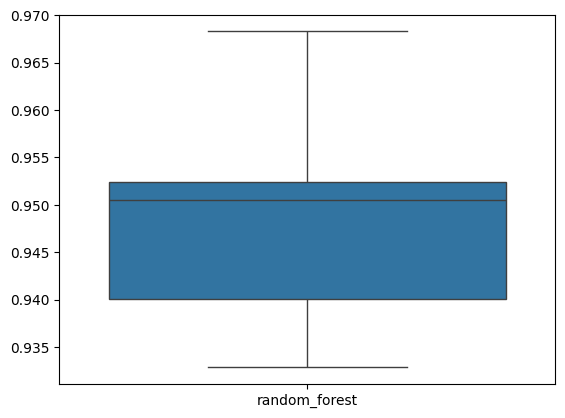

In [284]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'random_forest': scores_rand})
p = sns.boxplot(data = df_)
df_.min()

### Model Gradien Boosting

Karena dataset yang digunakan tidak seimbang pada variabel target sehingga model yang cocok adalah Gradien Boosting

In [285]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(xTrain, yTrain)
y_pred_grad = gradient_boosting.predict(xTest)
tn2, fp2, fn2, tp2 = confusion_matrix(yTest, y_pred_grad).ravel()
print(f'True Negatif : {tn2}, False Positif : {fp2}, False Negatif : {fn2}, True Positif : {tp2}')
print(classification_report(yTest, y_pred_grad))

True Negatif : 1072, False Positif : 13, False Negatif : 46, True Positif : 144
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1085
           1       0.92      0.76      0.83       190

    accuracy                           0.95      1275
   macro avg       0.94      0.87      0.90      1275
weighted avg       0.95      0.95      0.95      1275



Interpretasi:

1. **Matriks Konfusi:**
   - **True Positive (TP):** 114; jumlah observasi positif yang diprediksi dengan benar.
   - **True Negative (TN):** 1072; jumlah observasi negatif yang diprediksi dengan benar.
   - **False Positive (FP):** 13; jumlah observasi negatif yang salah diprediksi sebagai positif (kesalahan Type I).
   - **False Negative (FN):** 46; jumlah observasi positif yang salah diprediksi sebagai negatif (kesalahan Type II).

2. **Laporan Klasifikasi:**
   - **Precision:** Kemampuan model untuk tidak memberikan prediksi positif yang salah. Precision untuk kelas 0: 0.96, untuk kelas 1: 0.92.
   - **Recall (Sensitivitas):** Kemampuan model untuk menemukan semua instance positif yang sebenarnya. Recall untuk kelas 0: 0.99, untuk kelas 1: 0.76.
   - **F1-Score:** Penggabungan antara precision dan recall. F1-Score untuk kelas 0: 0.97, untuk kelas 1: 0.83.
   - **Accuracy:** Akurasi keseluruhan model: 0.95.

Kesimpulan:
- Model memiliki akurasi sekitar 0.95, yang berarti sekitar 95% dari prediksi model adalah benar.
- Model cenderung lebih baik dalam mengidentifikasi kelas 1 (recall 0.76) dibandingkan dengan kelas 0 (recall 0.99).
- Precision untuk kedua kelas relatif tinggi, menunjukkan bahwa ketika model membuat prediksi positif, prediksinya cenderung akurat.

In [286]:
mulai = time.time()
scores_rd = cross_val_score(gradient_boosting, predictor, target, cv=15) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Gradien Boosting: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rd.mean(), scores_rd.std() * 2, waktu))

Accuracy Gradien Boosting: 0.96 (+/- 0.02), Waktu = 32.302 detik


Melakukan cros validasi sebanyak 15 kali berulang sehingga didapat akurasinya 0.96

Gradien_Boosting    0.929329
Random_Forest       0.932862
dtype: float64

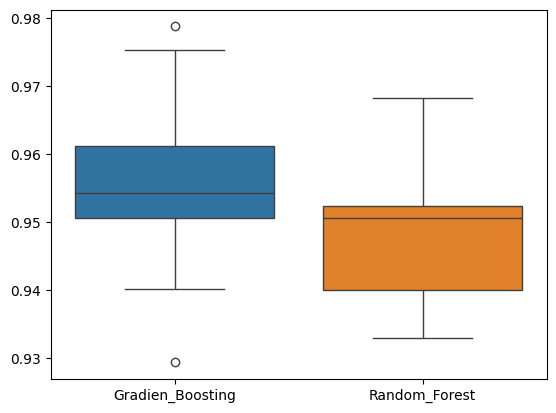

In [287]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'Gradien_Boosting': scores_rd, "Random_Forest":scores_rand})
p = sns.boxplot(data = df_)
df_.min()

##Testing Data Test

In [288]:
prediksi_rd = gradient_boosting.predict(df2)
print("Hasil Test Prediksi:", prediksi_rd)

Hasil Test Prediksi: [0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1

In [293]:
#Menggabungkan data
urlz = "https://raw.githubusercontent.com/ilman79/Chapter2-Binary/main/Data%20Test.csv"
data_testing = pd.read_csv(urlz)
data_testing['churn']=prediksi_rd

In [297]:
data_testing.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [298]:
file_name = 'data_predict.csv'
data_testing.to_csv(file_name, index=False)